# Generate meta-data and wordclouds for all companies 

In [1]:
import Preprocessing

companies = Preprocessing.execute("SELECT searchterm FROM tweet GROUP BY searchterm;")
companies = list(map(lambda x: x[0][1:], companies))
companies

['Adobe',
 'airliquidegroup',
 'Alstom',
 'ArcelorMittal',
 'Capgemini',
 'Cisco',
 'ENGIEgroup',
 'Forrester',
 'Generalelectric',
 'Intel',
 'MaerskLine',
 'Oracle',
 'orexad',
 'orexad_FR',
 'PublicisGroupe',
 'Rexel_Group',
 'SAFRAN',
 'Salesforce',
 'SolvayGroup',
 'TechnipGroup',
 'VMware',
 'VolvoTrucksFR']

### Preprocess tweets
time-consuming, see Preprocessing.py

In [2]:
data = []
for name in companies:
    %time data.append( Preprocessing.preprocessing( name, "en" ) )

CPU times: user 12min 51s, sys: 4.18 s, total: 12min 55s
Wall time: 13min 8s
CPU times: user 2min 2s, sys: 456 ms, total: 2min 2s
Wall time: 2min 4s
CPU times: user 1min 32s, sys: 428 ms, total: 1min 33s
Wall time: 1min 34s
CPU times: user 1min 51s, sys: 376 ms, total: 1min 51s
Wall time: 1min 52s
CPU times: user 10min 21s, sys: 2.61 s, total: 10min 24s
Wall time: 10min 40s
CPU times: user 12min 16s, sys: 4.17 s, total: 12min 21s
Wall time: 12min 41s
CPU times: user 3min 34s, sys: 924 ms, total: 3min 35s
Wall time: 3min 37s
CPU times: user 12min 58s, sys: 3.87 s, total: 13min 2s
Wall time: 13min 15s
CPU times: user 7min 44s, sys: 2.07 s, total: 7min 47s
Wall time: 7min 55s
CPU times: user 28min 27s, sys: 8.08 s, total: 28min 36s
Wall time: 28min 55s
CPU times: user 2min 1s, sys: 436 ms, total: 2min 2s
Wall time: 2min 3s
CPU times: user 17min 24s, sys: 5.07 s, total: 17min 29s
Wall time: 17min 40s
CPU times: user 20 ms, sys: 4 ms, total: 24 ms
Wall time: 1.25 s
CPU times: user 60 ms, sy

### Save preprocessed tweets in json file

In [2]:
import json

path = "../data/tweets.json"
#with open(path, 'w') as fd:
#    json.dump(json.dumps(data), fd)

raw_data = json.load(open(path)) 
data = json.loads(raw_data)

### Explore meta-data

In [4]:
import numpy as np
import pandas as pd

# get data
val = []
for company in data:
    name, nb_tw, nb_rtw, _, nb_lang_tw, nb_wds, nb_u_wds, _ = company
    val.append( [ name, nb_tw, nb_rtw, nb_lang_tw, nb_wds, nb_u_wds ] )
val = np.array(val)

# insert total row
total = np.concatenate( [ ["Total"], np.delete(val, [0], axis=1).astype(np.int).sum(axis=0) ] )
val = np.insert(val, 0, total, axis=0)

# sort by nb_tweets
val = np.array(sorted(val, key=lambda x: -int(x[1])))

# prepare for df
index = val[:,0]
val = np.delete(val, [0], axis=1).astype(int)

# calc total tweets percentage, and local english tweets percentage
perc_tw = np.array(list(map(lambda x : x[0] / int(total[1]), val))) * 100
loc_per_eng = np.array(list(map(lambda x : x[2] / x[0], val))) * 100

# insert perc
val = np.insert(val, 1, perc_tw, axis=1)
val = np.insert(val, 4, loc_per_eng, axis=1)

col = ["nb tweets", "% total tweets", "nb retweets", "nb eng tweets", "% local eng tweets", "nb words", "unique words"]
pd.DataFrame(val ,index=index, columns=col)

nb tweets  % total tweets  nb retweets  nb eng tweets  \
Total              1429334             100       839613        1294823   
Salesforce          301288              21       176267         288115   
Intel               268927              18       162246         248145   
Oracle              167369              11        94133         157188   
Cisco               121239               8        69673         112849   
Adobe               115396               8        62567         109382   
Forrester           114563               8        64396         109902   
Capgemini            79118               5        50890          72264   
VMware               73947               5        44413          70123   
Generalelectric      65515               4        36667          59346   
ENGIEgroup           29467               2        19008          11100   
SAFRAN               16812               1        12206           6633   
PublicisGroupe       16081               1         9868          11271   
MaerskLine           15056               1        10233          12185   
airliquidegroup      13923               0         8883           6149   
ArcelorMittal        11267               0         6047           7278   
Alstom               10567               0         7001           6528   
SolvayGroup           7639               0         4539           5885   
Rexel_Group            547               0          273            327   
VolvoTrucksFR          440               0          276             45   
TechnipGroup           165               0           23            108   
orexad_FR                6               0            3              0   
orexad                   2               0            1              0   

                 % local eng tweets  nb words  unique words  
Total                            90   7931747        363755  
Salesforce                       95   1701090         53377  
Intel                            92   1496213         56915  
Oracle                           93    991117         40632  
Cisco                            93    675282         33396  
Adobe                            94    654730         35902  
Forrester                        95    780612         21633  
Capgemini                        91    471027         22830  
VMware                           94    432616         22391  
Generalelectric                  90    324476         25480  
ENGIEgroup                       37     59998          7917  
SAFRAN                           39     37530          4693  
PublicisGroupe                   70     59544          7061  
MaerskLine                       80     73588          7299  
airliquidegroup                  44     37796          4840  
ArcelorMittal                    64     49250          7490  
Alstom                           61     42715          4672  
SolvayGroup                      77     41128          6322  
Rexel_Group                      59      2147           655  
VolvoTrucksFR                    10       229            80  
TechnipGroup                     65       659           170  
orexad_FR                         0         0             0  
orexad                            0         0             0

### generate wordclouds

show five first wordclouds

Adobe


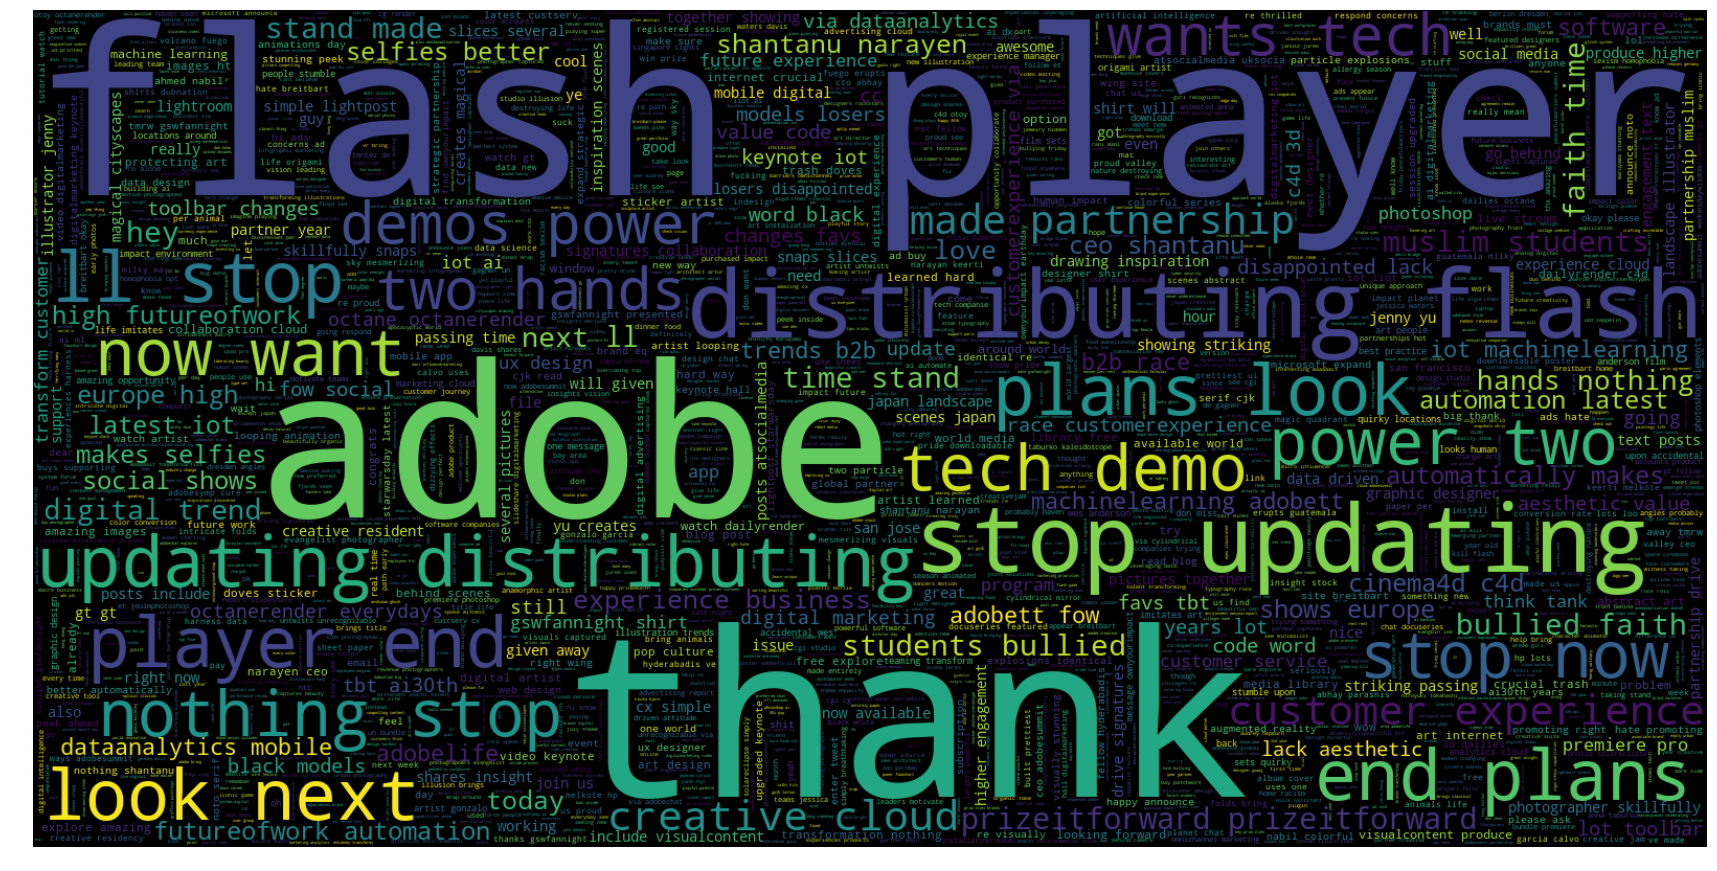

airliquidegroup


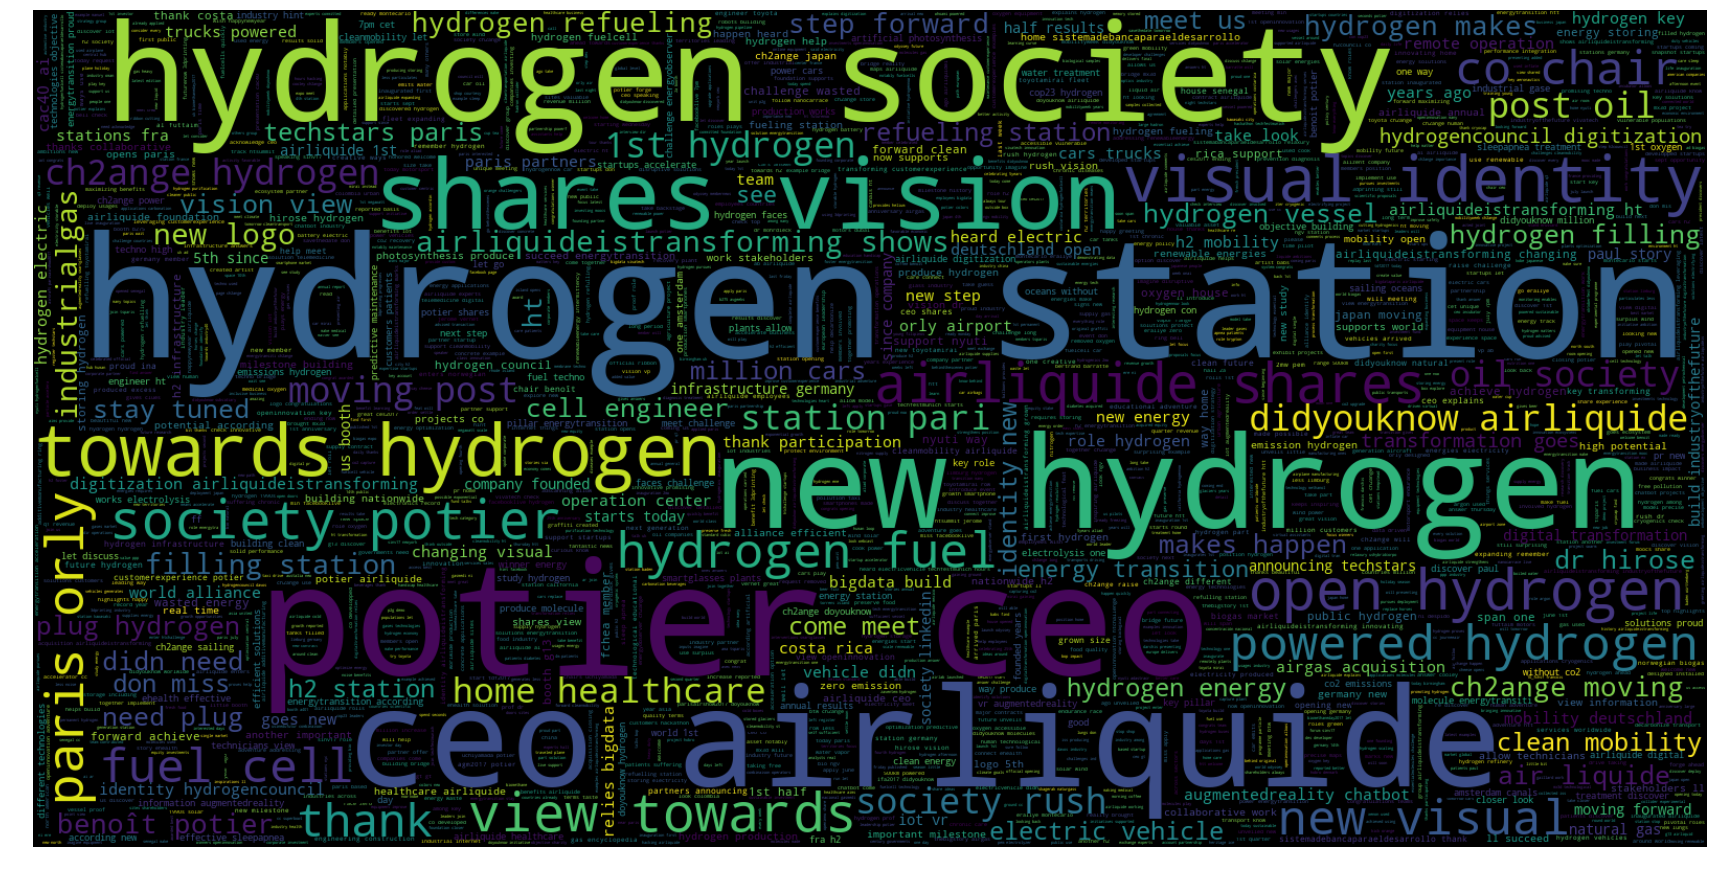

Alstom


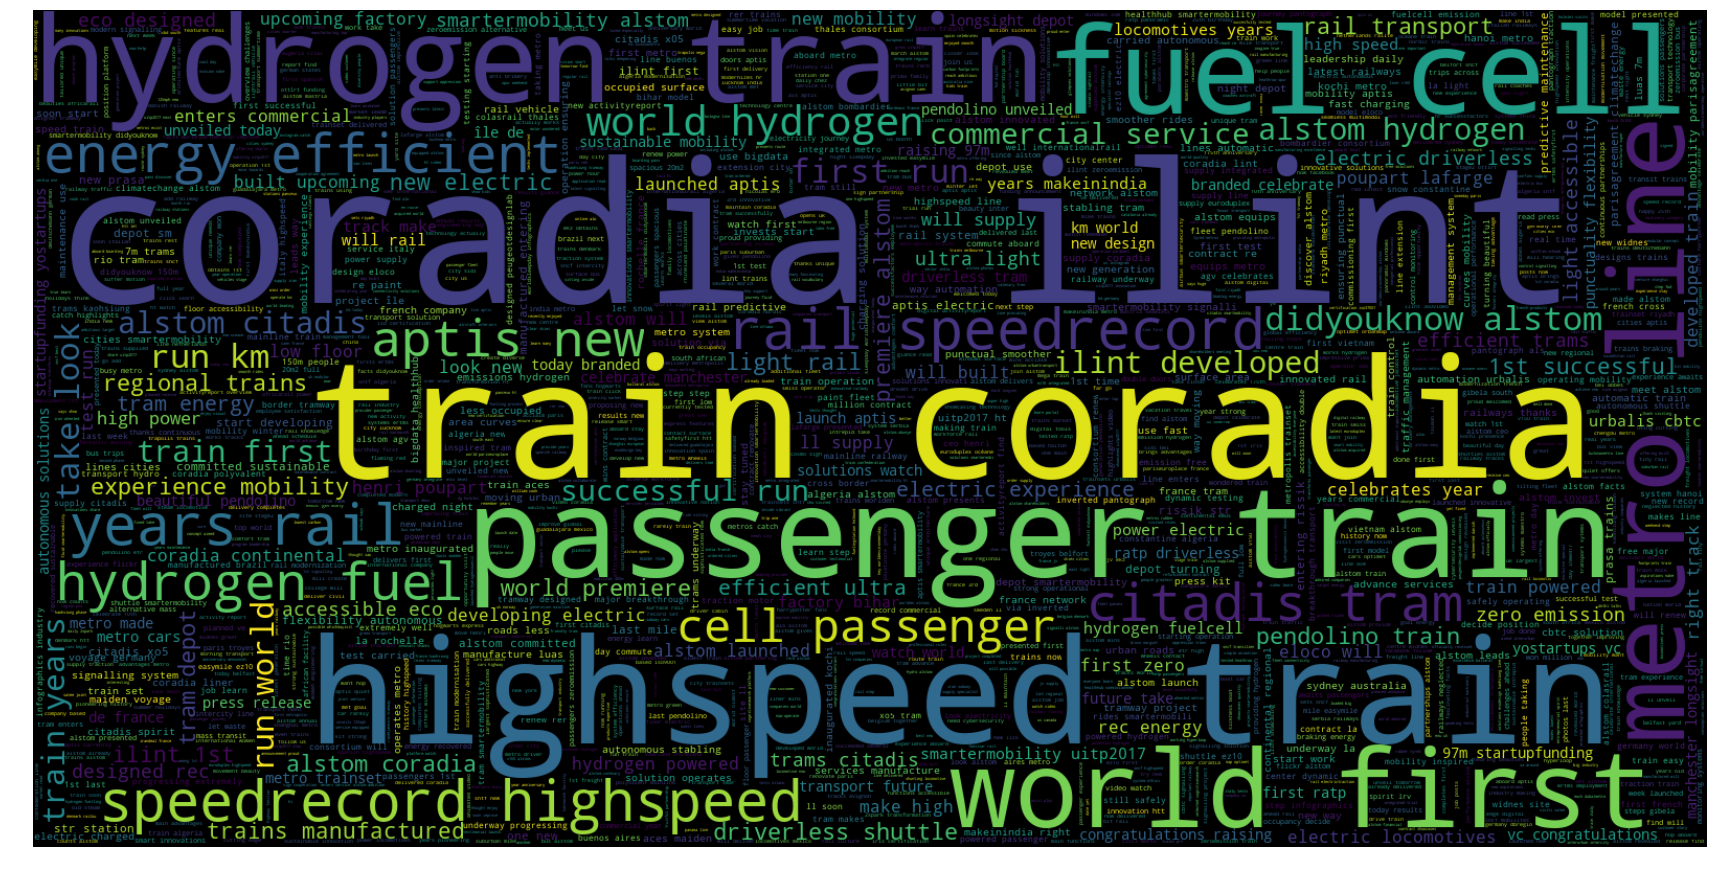

ArcelorMittal


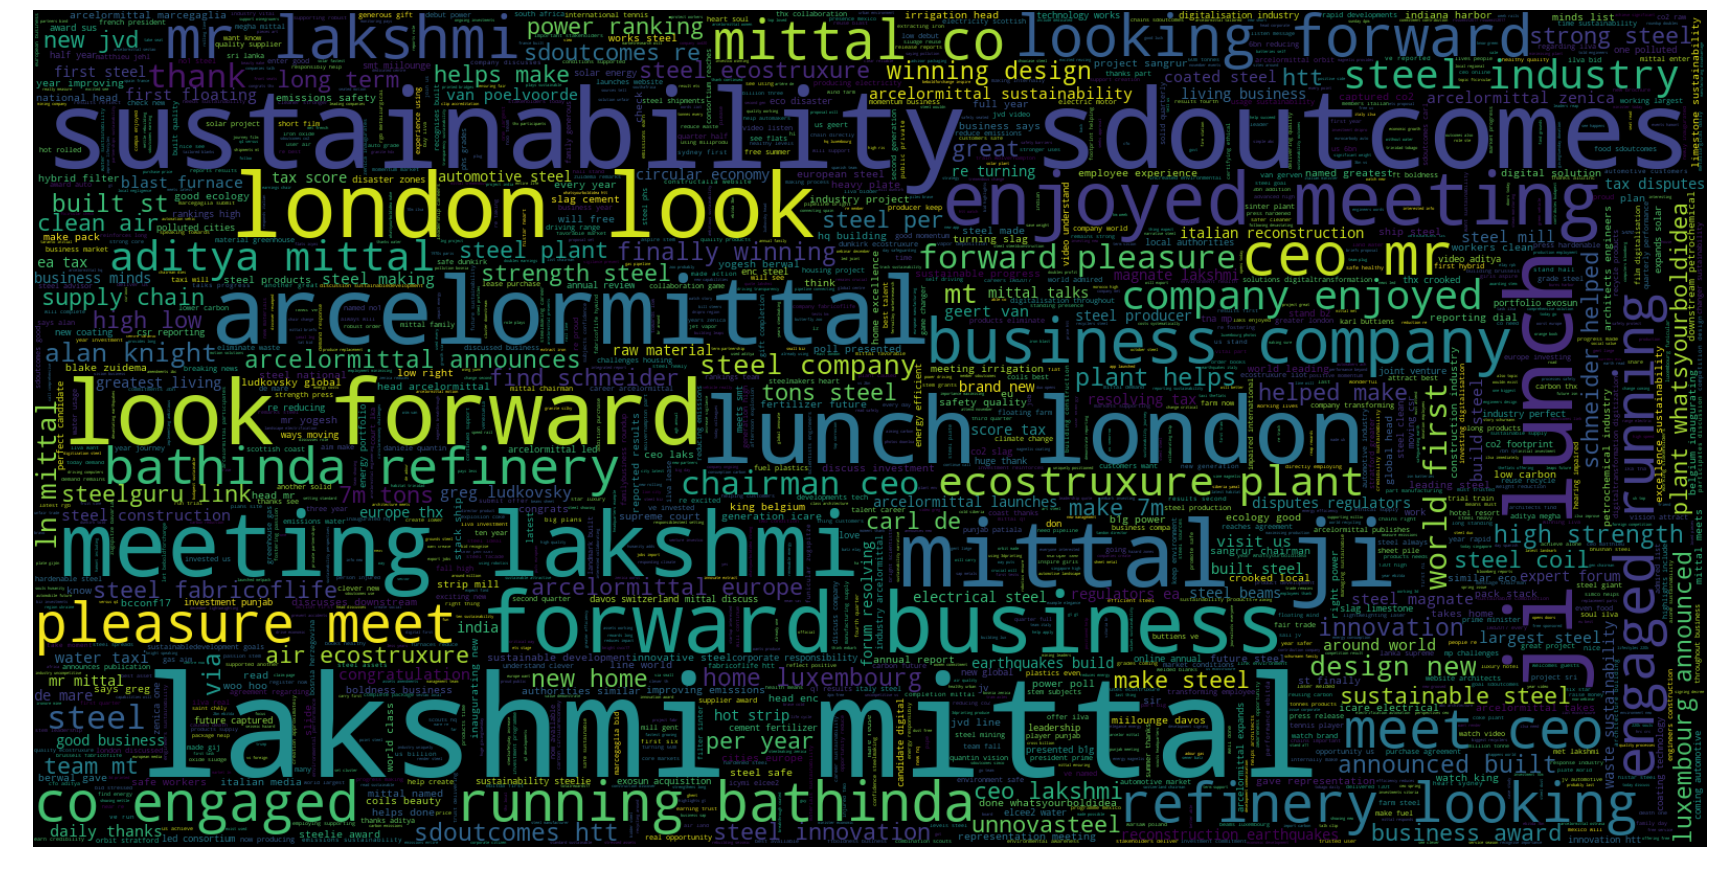

Capgemini


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for i in range(5):
    name, _, _, _, _, _, _, tweets = data[i]
    flat_list = [ word for tweet in tweets for word in tweet ]

    if len(flat_list) > 1:
        print (name)
    
        wordcloud = WordCloud(width=1600, height=800, max_words=2000).generate(" ".join(flat_list))

        plt.figure(figsize=(30, 30))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()

save to disk

In [6]:
for company in data:
    name, _, _, _, _, _, _, tweets = company
    flat_list = [ word for tweet in tweets for word in tweet ]

    if len(flat_list) > 1:
        wordcloud = WordCloud(width=1600, height=800, max_words=2000).generate(" ".join(flat_list))

        image = wordcloud.to_image()
        image.save("../results/wordcloud_" + name + ".png")

### save 100 most frequent words to csv file

build frequency dictionaries

In [23]:
import collections

companies = []
frequency_dict = []
for company in data:
    name, _, _, _, _, _, _, tweets = company

    # isolate bigrams
    bigrams = Preprocessing.mark_bigrams(tweets)

    # get frequency dictionary
    flat_text = [ word.lower() for tweet in bigrams for word in tweet ]
    frequ = collections.Counter(flat_text).most_common()

    if len(frequ) > 100:
        companies.append(name.upper())
        frequency_dict.append(frequ[:100])

export to csv

In [25]:
import csv

rows = np.array(list(frequency_dict)).T[0]

with open("../results/frequency_top_100.csv", 'w') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerow(companies)
    for row in rows:
        wr.writerow(row)